In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from collections import defaultdict
import matplotlib.pyplot as plt


Q1. 
Consider Fig.1 and remove the larger object from the image. [Hint: Create a mask and apply arithmetic operation].

Q1 Image


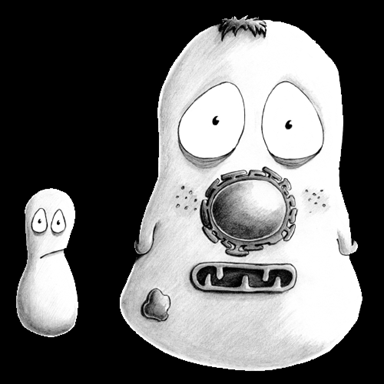



METHOD 1 - Bitwise Operations
Mask M1


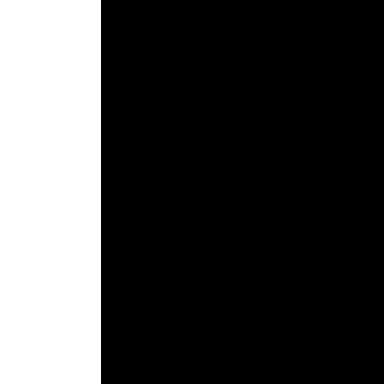

Resultant Image from Method 1


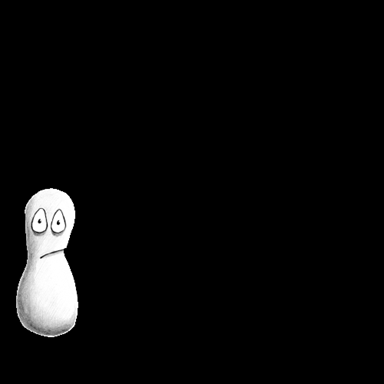



Q1 Image


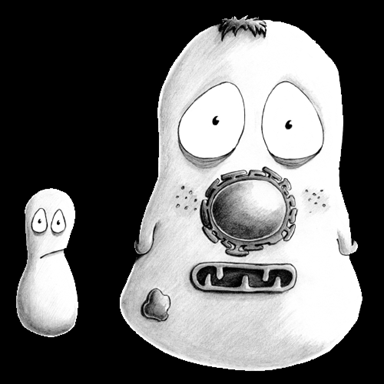

METHOD 2 - Arithmetic Operations
Mask M2 


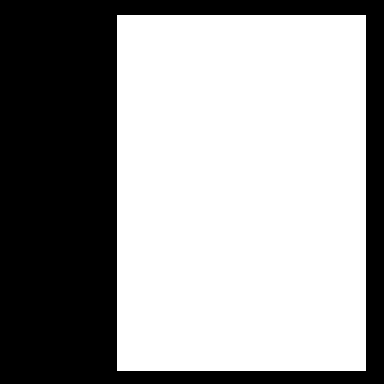

Resultant Image from Method 2


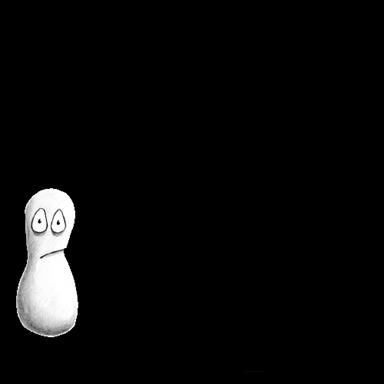

In [ ]:
image_Q1 = cv2.imread("/content/drive/MyDrive/AIP/A2/mask_orig.png")
print("Q1 Image")
cv2_imshow(image_Q1)


print("\n\n===================================================================")
print("METHOD 1 - Bitwise Operations")
# METHOD 1 - Bit wise operations 
mask_Q1 = np.zeros(image_Q1.shape[:2], dtype="uint8")
cv2.rectangle(mask_Q1, (0, 0), (100, 450), 255, -1)
print("Mask M1")
cv2_imshow( mask_Q1)

masked = cv2.bitwise_and(image_Q1, image_Q1, mask=mask_Q1)
print("Resultant Image from Method 1")
cv2_imshow(masked)


#METHOD 2 - Arithmetic Operations

print("\n\n===================================================================")
print("Q1 Image")
cv2_imshow(image_Q1)
print("METHOD 2 - Arithmetic Operations")
mask_Q1_m2 = np.zeros(image_Q1.shape, dtype="uint8")
cv2.rectangle(mask_Q1_m2, (117, 15), (365, 370),(255, 255, 255), -1)
print("Mask M2 ")
cv2_imshow( mask_Q1_m2)

#print(image_Q1.shape)
#print(mask_Q1_m2.shape)


masked_m2 = cv2.subtract(image_Q1, mask_Q1_m2)
print("Resultant Image from Method 2")
cv2_imshow(masked_m2)



Q2. 

Consider Fig.2, and find out whether the person has moved his hand from (a) to (b). You can
find out the percentage of change in pixels between them. Can you solve problem with any other
method?

In [ ]:
import numpy as np
import imutils
import cv2
def match_images(image, template, maxFeatures=500, keepPercent=1):

  imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  orb = cv2.ORB_create(maxFeatures)
  (kpsA, descsA) = orb.detectAndCompute(imageGray, None)
  (kpsB, descsB) = orb.detectAndCompute(templateGray, None)

  method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
  matcher = cv2.DescriptorMatcher_create(method)
  matches = matcher.match(descsA, descsB, None)


  matches = sorted(matches, key=lambda x:x.distance)

  keep = int(len(matches) * keepPercent)
  matches = matches[:keep]

  matchedVis = cv2.drawMatches(image, kpsA, template, kpsB, matches, None)
  matchedVis = imutils.resize(matchedVis, width=1000)
  cv2_imshow( matchedVis) 


# image_Q2_A = cv2.imread("/content/drive/MyDrive/AIP/A2/image-math-person1.png")
# print("image_Q2_A ")
# cv2_imshow(image_Q2_A )

# image_Q2_B = cv2.imread("/content/drive/MyDrive/AIP/A2/image-math-person2.png")
# print("image_Q2_B ")
# cv2_imshow(image_Q2_B)





image_Q2_A 


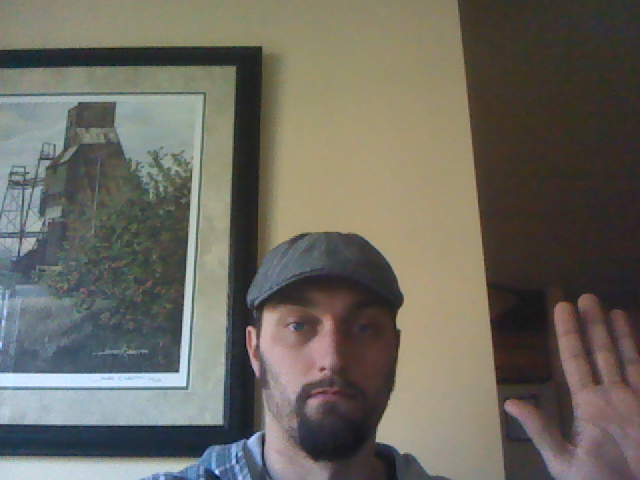


image_Q2_B 


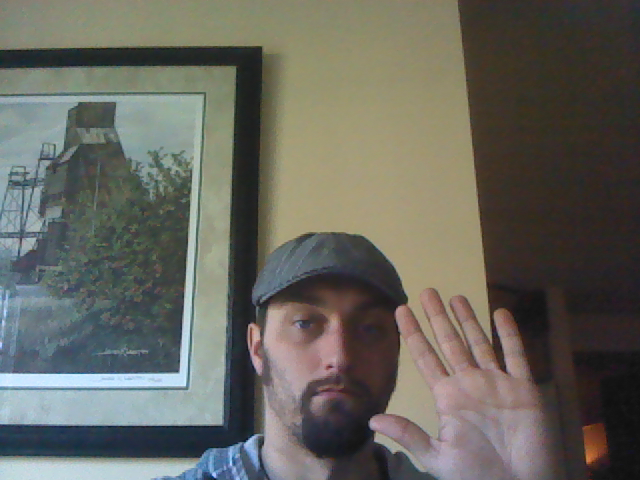


Subtraction Image A - Image B


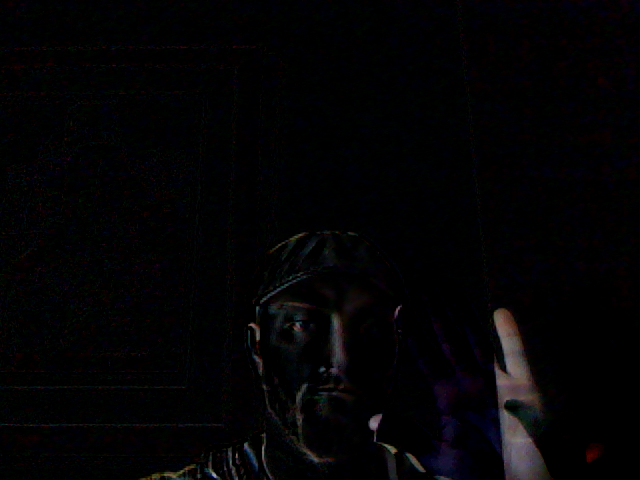

No. of changed pixels :  184053
Total no. of pixels in image :  307200
Percentage change in pixels : 59.9130859375


Image Registration's Matching Step : This is  required in order to be able to compare or integrate the data obtained from these different measurements.

Matched Keypoints : When 2 iamges are same


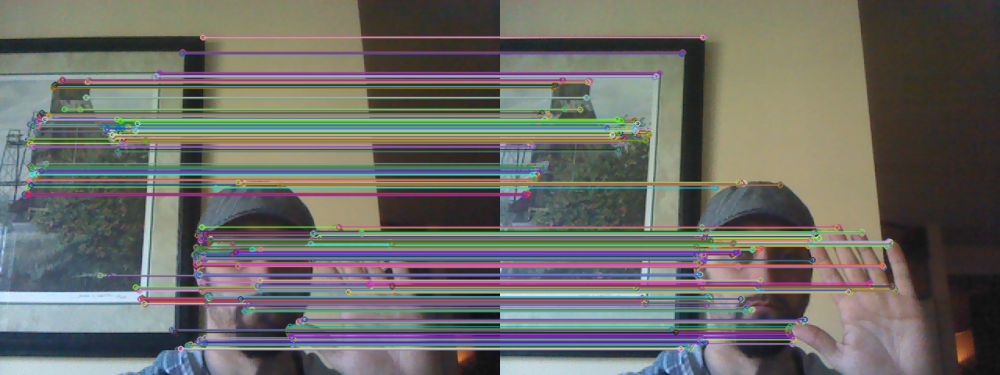


Matched Keypoints : When 2 iamges are slightly different


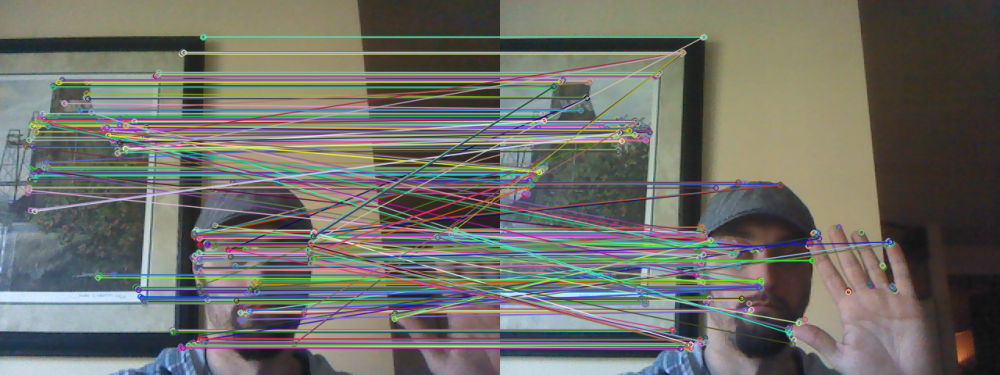

In [ ]:
image_Q2_A = cv2.imread("/content/drive/MyDrive/AIP/A2/image-math-person1.png")
print("image_Q2_A ")
cv2_imshow(image_Q2_A )

image_Q2_B = cv2.imread("/content/drive/MyDrive/AIP/A2/image-math-person2.png")
print("\nimage_Q2_B ")
cv2_imshow(image_Q2_B)



sub_img_Q2 = cv2.subtract(image_Q2_B, image_Q2_A)
print("\nSubtraction Image A - Image B")
cv2_imshow(sub_img_Q2)

sub_img_Q2= cv2.cvtColor(sub_img_Q2, cv2.COLOR_RGB2GRAY);

nzCount_Q2 = cv2.countNonZero(sub_img_Q2);
print("No. of changed pixels : ",nzCount_Q2 );

total_pixels_Q2=sub_img_Q2.shape[0] * sub_img_Q2.shape[1]
print("Total no. of pixels in image : ",total_pixels_Q2 )

percent_change_in_pixel= (nzCount_Q2/total_pixels_Q2)*100;
print("Percentage change in pixels :",percent_change_in_pixel );


print("================================================================================")
# Second method -  image registration (image matching step)
print("\n\nImage Registration's Matching Step : This is  required in order to be able to compare or integrate the data obtained from these different measurements.")
print("\nMatched Keypoints : When 2 iamges are same")
match_images(image_Q2_B, image_Q2_B)

print("\nMatched Keypoints : When 2 iamges are slightly different")
match_images(image_Q2_A, image_Q2_B)

Q3.

A.
Load the image shown in Fig.3. Examine the distinct intensity levels that the image has. Consider each of the intensity levels as random variable, and compute the probabilities of each of the intensity level. 

B.
Plot the computed probabilities with respect to the the intensity levels.

C.
Now, add constant value 100 with the image of Fig.3, and plot the probabilities with respect
to the the intensity levels. 

D.
Observe the difference between two plots. 

E. 
What kind of arithmetic operation on the image would shift the probability distribution towards the left? 

F.
If you downsample the given image by a factor 2, and plot the probability distribution – what will happen? Explain your observation.

In [ ]:
def generatehistogram(Img):
  #convert to grayscale
  #Img= cv2.cvtColor(Img, cv2.COLOR_RGB2GRAY);
  #cv2_imshow(Img )
  #print(Img.shape)
  #print(type(Img))

  
  #256 Disitnct  intensity levels ( 0 - 255 )

  LL=list(range(0,256));
  #print(LL)

  HistogramCount= defaultdict(int);

  for i in LL:
    HistogramCount[i]=0;

  R,C=Img.shape;

  for x in range(0,R):
    for y in range(0,C):
      HistogramCount[Img[x][y]]=HistogramCount[Img[x][y]]+1;
      #print("heerre")

  #print(HistogramCount)

  return HistogramCount





A. ==========================================
image_Q3 


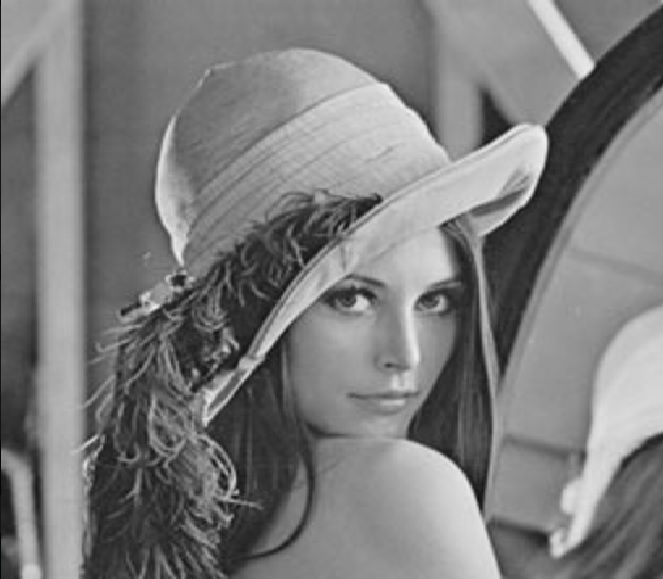

total no. of pixels ;  383877
Probabilty At Each Intensity Level :  [(0, 0.0), (1, 0.0), (2, 0.0), (3, 2.6050010810754487e-06), (4, 7.815003243226346e-06), (5, 4.949502054043352e-05), (6, 0.00016151006702667782), (7, 9.63850399997916e-05), (8, 1.3025005405377243e-05), (9, 7.815003243226346e-06), (10, 0.0), (11, 2.6050010810754487e-06), (12, 7.815003243226346e-06), (13, 0.0), (14, 2.6050010810754487e-06), (15, 7.815003243226346e-06), (16, 2.6050010810754487e-06), (17, 1.0420004324301795e-05), (18, 1.0420004324301795e-05), (19, 0.00018495507675635685), (20, 0.0006642752756742394), (21, 0.0003647001513505628), (22, 8.857003675656525e-05), (23, 7.033502918903712e-05), (24, 9.899004108086705e-05), (25, 0.00014588006054022513), (26, 0.000203190084323885), (27, 0.000255290105945394), (28, 0.0003673051524316383), (29, 0.0003907501621613173), (30, 0.0005392352237826179), (31, 0.0006746952799985412), (32, 0.0007815003243226346), (33, 0.0009664554010789915), (34, 0.001120150464862443), (35, 0.001

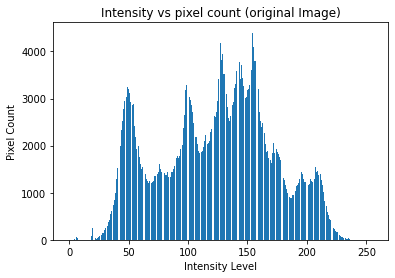

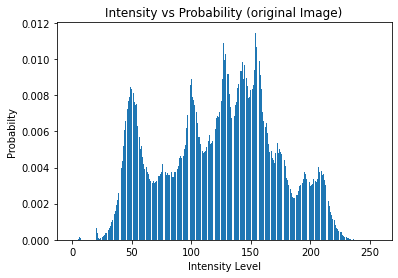



C. ==========================================
Original Image
[[  6 163 162 ... 143 157 171]
 [  6 163 163 ... 143 156 169]
 [  5 163 163 ... 142 152 161]
 ...
 [  6  48  47 ...  82  87  94]
 [  6  48  47 ...  85  89  95]
 [  6  48  47 ...  86  90  96]]

Image when 100 is added 
[[106 255 255 ... 243 255 255]
 [106 255 255 ... 243 255 255]
 [105 255 255 ... 242 252 255]
 ...
 [106 148 147 ... 182 187 194]
 [106 148 147 ... 185 189 195]
 [106 148 147 ... 186 190 196]]


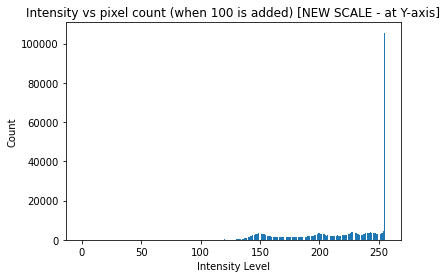

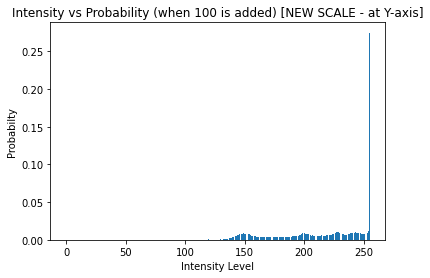

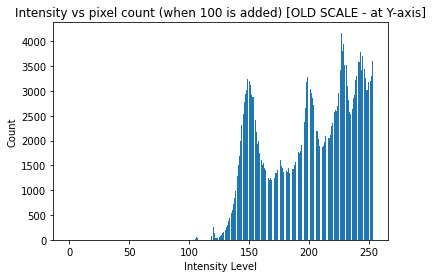

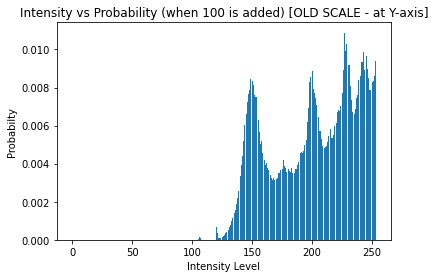



D. ==========================================
Observation : Histogram shifted to right when a constant 100 is added to all pixel intensities 


E. ==========================================
To shift histogram shifted to left, a constant (E.g. 110) should be subtracted from all pixel intensities 
Original Image
[[  6 163 162 ... 143 157 171]
 [  6 163 163 ... 143 156 169]
 [  5 163 163 ... 142 152 161]
 ...
 [  6  48  47 ...  82  87  94]
 [  6  48  47 ...  85  89  95]
 [  6  48  47 ...  86  90  96]]

Image when 110 is subtracted 
[[ 0 53 52 ... 33 47 61]
 [ 0 53 53 ... 33 46 59]
 [ 0 53 53 ... 32 42 51]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


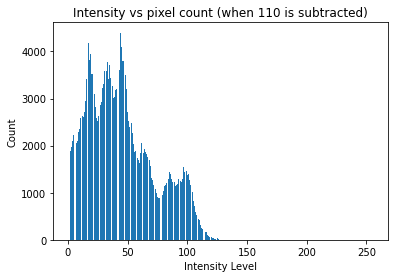

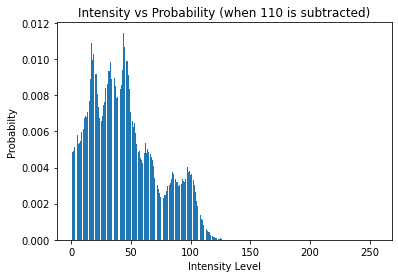



F. ==========================================
image_Q3_downsampled 


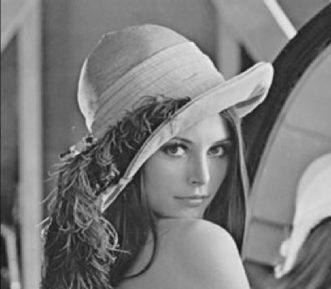

Orignal Image size :  (579, 663)
image_Q3_downsampled size :  (289, 331)


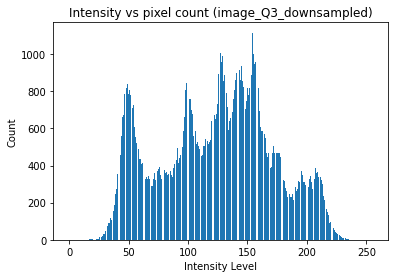

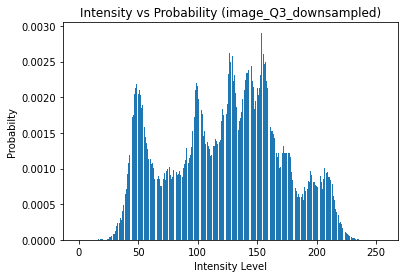

Observation : After dowsampling, although the shape of the histogram remains same but height is reduced. (Please check Y-axis scale to spot the difference


In [ ]:
print("A. ==========================================")
image_Q3 = cv2.imread("/content/drive/MyDrive/AIP/A2/lena_face.jpg")
print("image_Q3 ")
cv2_imshow(image_Q3 )

#print(image_Q3.shape) # 3 channel image 
#print(type(image_Q3))
image_Q3= cv2.cvtColor(image_Q3, cv2.COLOR_RGB2GRAY);


histA=generatehistogram(image_Q3);

A_x=list(histA.keys());
A_y_cnt=list(histA.values());

#probability distribution
totalPixel=sum(A_y_cnt);
print("total no. of pixels ; ", totalPixel) # also verified as img.shape[0]*img.shape[1]

A_y_prob = [ll / totalPixel for ll in A_y_cnt];

ProbabiltyAtEachIntensityLevel= list(zip(A_x, A_y_prob));

print("Probabilty At Each Intensity Level : ", ProbabiltyAtEachIntensityLevel)

print("\n\nB. ==========================================")
plt.figure();
plt.bar(A_x, A_y_cnt)
plt.xlabel('Intensity Level')
plt.ylabel('Pixel Count')
plt.title("Intensity vs pixel count (original Image)")

plt.show()

plt.figure();
plt.bar(A_x, A_y_prob)
plt.xlabel('Intensity Level')
plt.ylabel('Probabilty')
plt.title("Intensity vs Probability (original Image)")
plt.show()



print("\n\nC. ==========================================")
print("Original Image")
print(image_Q3)
Result_C= cv2.add(image_Q3, 100)

print("\nImage when 100 is added ")
print(Result_C)
histC=generatehistogram(Result_C);

C_x=list(histC.keys());
C_y_cnt=list(histC.values());

C_y_prob = [ll / totalPixel for ll in C_y_cnt];

#print(C_y_cnt[100:])

plt.figure();
plt.bar(C_x, C_y_cnt)
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title("Intensity vs pixel count (when 100 is added) [NEW SCALE - at Y-axis]")
plt.show()

plt.figure();
plt.bar(C_x, C_y_prob)
plt.xlabel('Intensity Level')
plt.ylabel('Probabilty')
plt.title("Intensity vs Probability (when 100 is added) [NEW SCALE - at Y-axis]")
plt.show()


plt.figure();
plt.bar(C_x[:-2], C_y_cnt[:-2])
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title("Intensity vs pixel count (when 100 is added) [OLD SCALE - at Y-axis]")
plt.show()

plt.figure();
plt.bar(C_x[:-2], C_y_prob[:-2])
plt.xlabel('Intensity Level')
plt.ylabel('Probabilty')
plt.title("Intensity vs Probability (when 100 is added) [OLD SCALE - at Y-axis]")
plt.show()

print("\n\nD. ==========================================")
print("Observation : Histogram shifted to right when a constant 100 is added to all pixel intensities ")


print("\n\nE. ==========================================")
print("To shift histogram shifted to left, a constant (E.g. 110) should be subtracted from all pixel intensities ")

print("Original Image")
print(image_Q3)
Result_E= cv2.subtract(image_Q3, 110)

print("\nImage when 110 is subtracted ")
print(Result_E)
histE=generatehistogram(Result_E);

E_x=list(histE.keys());
E_y_cnt=list(histE.values());

E_y_prob = [ll / totalPixel for ll in E_y_cnt];

#print(E_y_cnt)


plt.figure();
plt.bar(E_x[1:], E_y_cnt[1:])
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title("Intensity vs pixel count (when 110 is subtracted)")
plt.show()

plt.figure();
plt.bar(E_x[1:], E_y_prob[1:])
plt.xlabel('Intensity Level')
plt.ylabel('Probabilty')
plt.title("Intensity vs Probability (when 110 is subtracted)")
plt.show()


print("\n\nF. ==========================================")
Q3_R, Q3_C= image_Q3.shape

Q3_downsampled_width = Q3_C//2
Q3_downsampled_height = Q3_R//2
Q3_downsampled_size = (Q3_downsampled_width, Q3_downsampled_height)
image_Q3_downsampled = cv2.resize(image_Q3, Q3_downsampled_size, interpolation= cv2.INTER_AREA)
print("image_Q3_downsampled ")
cv2_imshow(image_Q3_downsampled ) 

print("Orignal Image size : ",image_Q3.shape )
print("image_Q3_downsampled size : ",image_Q3_downsampled.shape )

#Generrate histogram
histF=generatehistogram(image_Q3_downsampled);

F_x=list(histF.keys());
F_y_cnt=list(histF.values());

F_y_prob = [ll / totalPixel for ll in F_y_cnt];

#print(F_y_cnt)


plt.figure();
plt.bar(F_x, F_y_cnt)
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title("Intensity vs pixel count (image_Q3_downsampled)")
plt.show()

plt.figure();
plt.bar(F_x, F_y_prob)
plt.xlabel('Intensity Level')
plt.ylabel('Probabilty')
plt.title("Intensity vs Probability (image_Q3_downsampled)")
plt.show()

print("Observation : After dowsampling, although the shape of the histogram remains same but height is reduced. (Please check Y-axis scale to spot the difference")



Q4 :
Implement an algorithm to find out the numberplate of Fig.4(a) within the image (Fig. 4(b)).

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
##### importing the image files

image = cv2.imread('/content/drive/MyDrive/AIP/A2/number_plate.jpg')
filter = cv2.imread('/content/drive/MyDrive/AIP/A2/plate.jpg')

In [ ]:
##### Shape of filter image

filter.shape

(74, 271, 3)

In [ ]:
##### Shape of overall image

image.shape

(510, 827, 3)

In [ ]:
##### converting images into grayscale

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(int)
gray_filter = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY).astype(int)
print(gray_image.shape)
print(gray_filter.shape)

(510, 827)
(74, 271)


In [ ]:
##### function to calculate the similarity value for each pixel

def calculate_max_similarity_index(image, filter):
  similarity_matrix = np.zeros(image.shape)
  row_f, col_f = filter.shape
  row_i, col_i = image.shape
  for i in range(0, row_i - row_f):
    for j in range(0, col_i - col_f):
      checking_mat = image[i:i+row_f, j:j+col_f]
      similarity_matrix[i][j] = np.sum(np.multiply(checking_mat, filter))/np.linalg.norm(checking_mat)
  
  return similarity_matrix

In [ ]:
##### Finding out the co-ordinates of maximum similarity value

sim_mat = calculate_max_similarity_index(gray_image, gray_filter)
max_xy = np.where(sim_mat == sim_mat.max())
x_max, y_max = (max_xy[0][0], max_xy[1][0])

In [ ]:
##### maximum similarity indexes

print(x_max)
print(y_max)

301
305


In [ ]:
##### finding length and width of the filter

row_f, col_f = gray_filter.shape
print(row_f)
print(col_f)

74
271


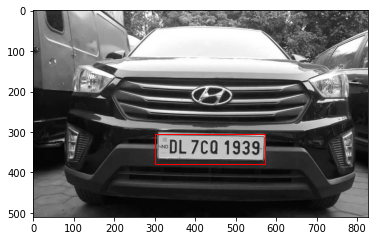

In [ ]:
###### plotting a rectangle around the resultant extracted image

import matplotlib

figure, ax = matplotlib.pyplot.subplots(1)
rect = matplotlib.patches.Rectangle((x_max, y_max), col_f, row_f, edgecolor='r', facecolor="none")

ax.imshow(image)
ax.add_patch(rect)

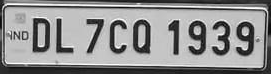

In [ ]:
#######  checking if the results are correct just by printing the extracted image

extracted_img = image[x_max:x_max+row_f, y_max:y_max+col_f, :]
cv2_imshow(extracted_img)